<a href="https://colab.research.google.com/github/CrystalFireSword/MachineLearningCohortAssignments/blob/main/Disease_Prediction_Based_On_Symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("Symptom2Disease.csv")
print(df.head())

   Unnamed: 0      label                                               text
0           0  Psoriasis  I have been experiencing a skin rash on my arm...
1           1  Psoriasis  My skin has been peeling, especially on my kne...
2           2  Psoriasis  I have been experiencing joint pain in my fing...
3           3  Psoriasis  There is a silver like dusting on my skin, esp...
4           4  Psoriasis  My nails have small dents or pits in them, and...


In [ ]:
print(df.isnull().sum()) # missing values
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])
X = df['text']  # symptom descriptions
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Unnamed: 0    0
label         0
text          0
dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear')
}
results = {}
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("#####################################")

Logistic Regression Accuracy: 0.97
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       1.00      0.92      0.96        12
                    Common Cold       1.00      1.00      1.00        12
                         Dengue       1.00      0.83      0.91        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
               

<ipython-input-89-2fa5471fc605>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="pastel")


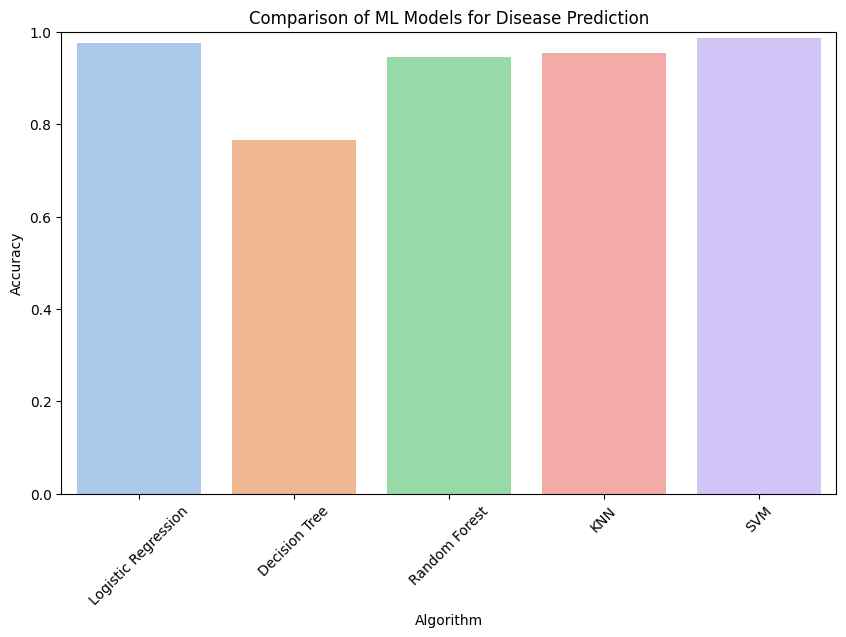

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="pastel")
plt.title("Comparison of ML Models for Disease Prediction")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
def recommend_disease(symptoms):
    symptoms_vec = vectorizer.transform([symptoms])
    prediction_lr = models["Logistic Regression"].predict(symptoms_vec)
    prediction_dt = models["Decision Tree"].predict(symptoms_vec)
    prediction_rf = models["Random Forest"].predict(symptoms_vec)
    prediction_knn = models["KNN"].predict(symptoms_vec)
    prediction_svm = models["SVM"].predict(symptoms_vec)
    disease_lr = label_encoder.inverse_transform(prediction_lr)[0]
    disease_dt = label_encoder.inverse_transform(prediction_dt)[0]
    disease_rf = label_encoder.inverse_transform(prediction_rf)[0]
    disease_knn = label_encoder.inverse_transform(prediction_knn)[0]
    disease_svm = label_encoder.inverse_transform(prediction_svm)[0]
    print("\n|||Symptoms:", symptoms)
    print("\nDisease Predictions from Different Models:")
    print(f"a) Logistic Regression: {disease_lr}")
    print(f"b) Decision Tree: {disease_dt}")
    print(f"c) Random Forest: {disease_rf}")
    print(f"d) K-Nearest Neighbors: {disease_knn}")
    print(f"e) Support Vector Machine: {disease_svm}")
    predictions = [disease_lr, disease_dt, disease_rf, disease_knn, disease_svm]
    final_prediction = max(set(predictions), key=predictions.count)
    print(f"\n   Final Recommendation (Majority Vote): {final_prediction}")

    return final_prediction


recommend_disease("I have a fever, headache, and fatigue")
recommend_disease("My nails pain")
recommend_disease("There are red and gray pigments in my skin")
recommend_disease("I feel burning sensation in my throat")
recommend_disease("I am unable to sleep, my eyes are feeling pressure")
recommend_disease("My head is severely in pain with frequent nose block and sneezing")
recommend_disease("My knees and muscles near the ankle pain")
recommend_disease("I feel cold and shivering sensation")



|||Symptoms: I have a fever, headache, and fatigue

Disease Predictions from Different Models:
a) Logistic Regression: Chicken pox
b) Decision Tree: Chicken pox
c) Random Forest: Chicken pox
d) K-Nearest Neighbors: Jaundice
e) Support Vector Machine: Chicken pox

   Final Recommendation (Majority Vote): Chicken pox

|||Symptoms: My nails pain

Disease Predictions from Different Models:
a) Logistic Regression: Psoriasis
b) Decision Tree: Psoriasis
c) Random Forest: drug reaction
d) K-Nearest Neighbors: Psoriasis
e) Support Vector Machine: Psoriasis

   Final Recommendation (Majority Vote): Psoriasis

|||Symptoms: There are red and gray pigments in my skin

Disease Predictions from Different Models:
a) Logistic Regression: Fungal infection
b) Decision Tree: Fungal infection
c) Random Forest: Fungal infection
d) K-Nearest Neighbors: Fungal infection
e) Support Vector Machine: Fungal infection

   Final Recommendation (Majority Vote): Fungal infection

|||Symptoms: I feel burning sensatio

'drug reaction'

Inference:
1. The accuracy is heavily dependent on the words used as the models tokenize these words.
2. Both the decision tree and random forest give "drug reaction" when they see something unfamiliar
3. The models do sensibly when the symptoms are detailed and familiar to the model and the dataset in general.
4. Putting all models together and using them together ensures that the individual shortcomings of each model do not affect the final result heavily.